# Лабораторная работа 0

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Датасет

Считаем датасет скачанный с kaggle: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download&select=train.csv

In [55]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [56]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

* Gender - Пол
* Customer Type - Тип клиента
* Age - Возраст
* Type of Travel - Тип путешествия
* Class - Класс
* Flight Distance - Расстояние полета
* Inflight wifi service - Услуга Wi-Fi на борту
* Departure/Arrival time convenient - Удобное время отправления/прибытия
* Ease of Online booking - Простота онлайн-бронирования
* Gate location - Расположение ворот
* Food and drink - Еда и напитки
* Online boarding - Доска объявлений
* Seat comfort - Комфорт сиденья
* Inflight entertainment - Развлечения на борту
* On-board service - Бортовая служба
* Leg room service - Обслуживание ног
* Baggage handling - Обработка багажа
* Checkin service - Служба регистрации
* Inflight service - Обслуживание в полете
* Cleanliness - Чистота
* Departure Delay in Minutes - Задержка отправления в минутах
* Arrival Delay in Minutes - Задержка прибытия в минутах
* satisfaction - Удовлетворение

In [58]:
data.shape

(103904, 25)

## Пустые записи и лишние колонки

Смотрим количество пустых записей

In [59]:
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Удаляем лишниие колонки

In [60]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('id', axis=1)

Заполняем пустые ячейки среднем значением

In [61]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean())

Заменяем строковые записи на числа

In [62]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(train[col])

Проверяем

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Корреляции

Смотрим корреляции

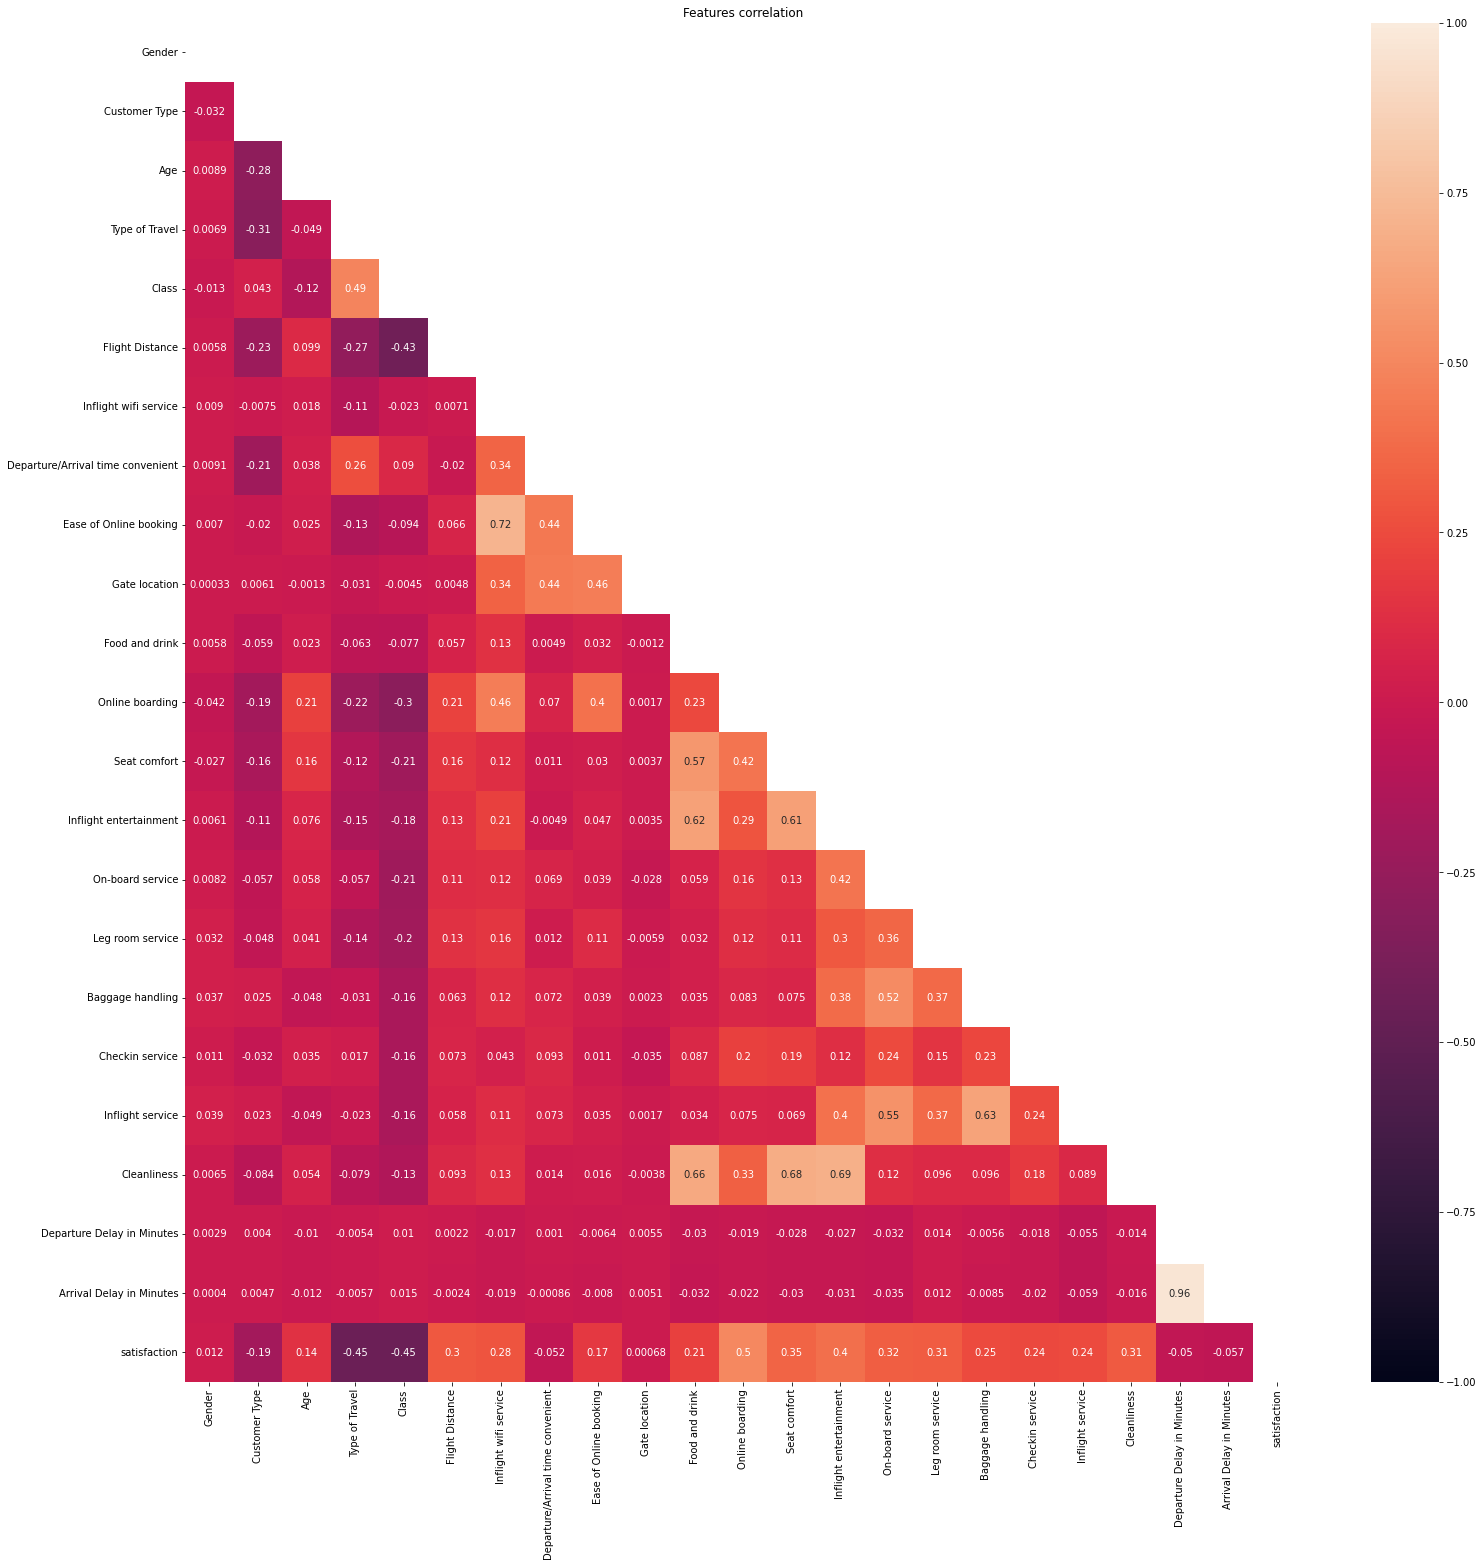

In [64]:
fig, ax = plt.subplots(figsize=(25, 25))
ax.set_title("Features correlation")
corr_df = data.corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, mask=mask, ax=ax);

Видим очень большую корреляцию в задержке прибытия и отправления, поэтому удаляем задержку прибития, тем более там были пропуски

In [65]:
data = data.drop('Arrival Delay in Minutes', axis=1)

## Фичи

Делим на количественные и категориальные фичи

In [66]:
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes']
categorical_features = [feat for feat in list(data.columns) if feat != 'satisfaction' and feat not in numerical_features]

Смотрим на количественные фичи

In [67]:
data[numerical_features].describe()

,Age,Flight Distance,Departure Delay in Minutes
count,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618
std,15.114964,997.147281,38.230901
min,7.000000,31.000000,0.000000
25%,27.000000,414.000000,0.000000
50%,40.000000,843.000000,0.000000
75%,51.000000,1743.000000,12.000000
max,85.000000,4983.000000,1592.000000


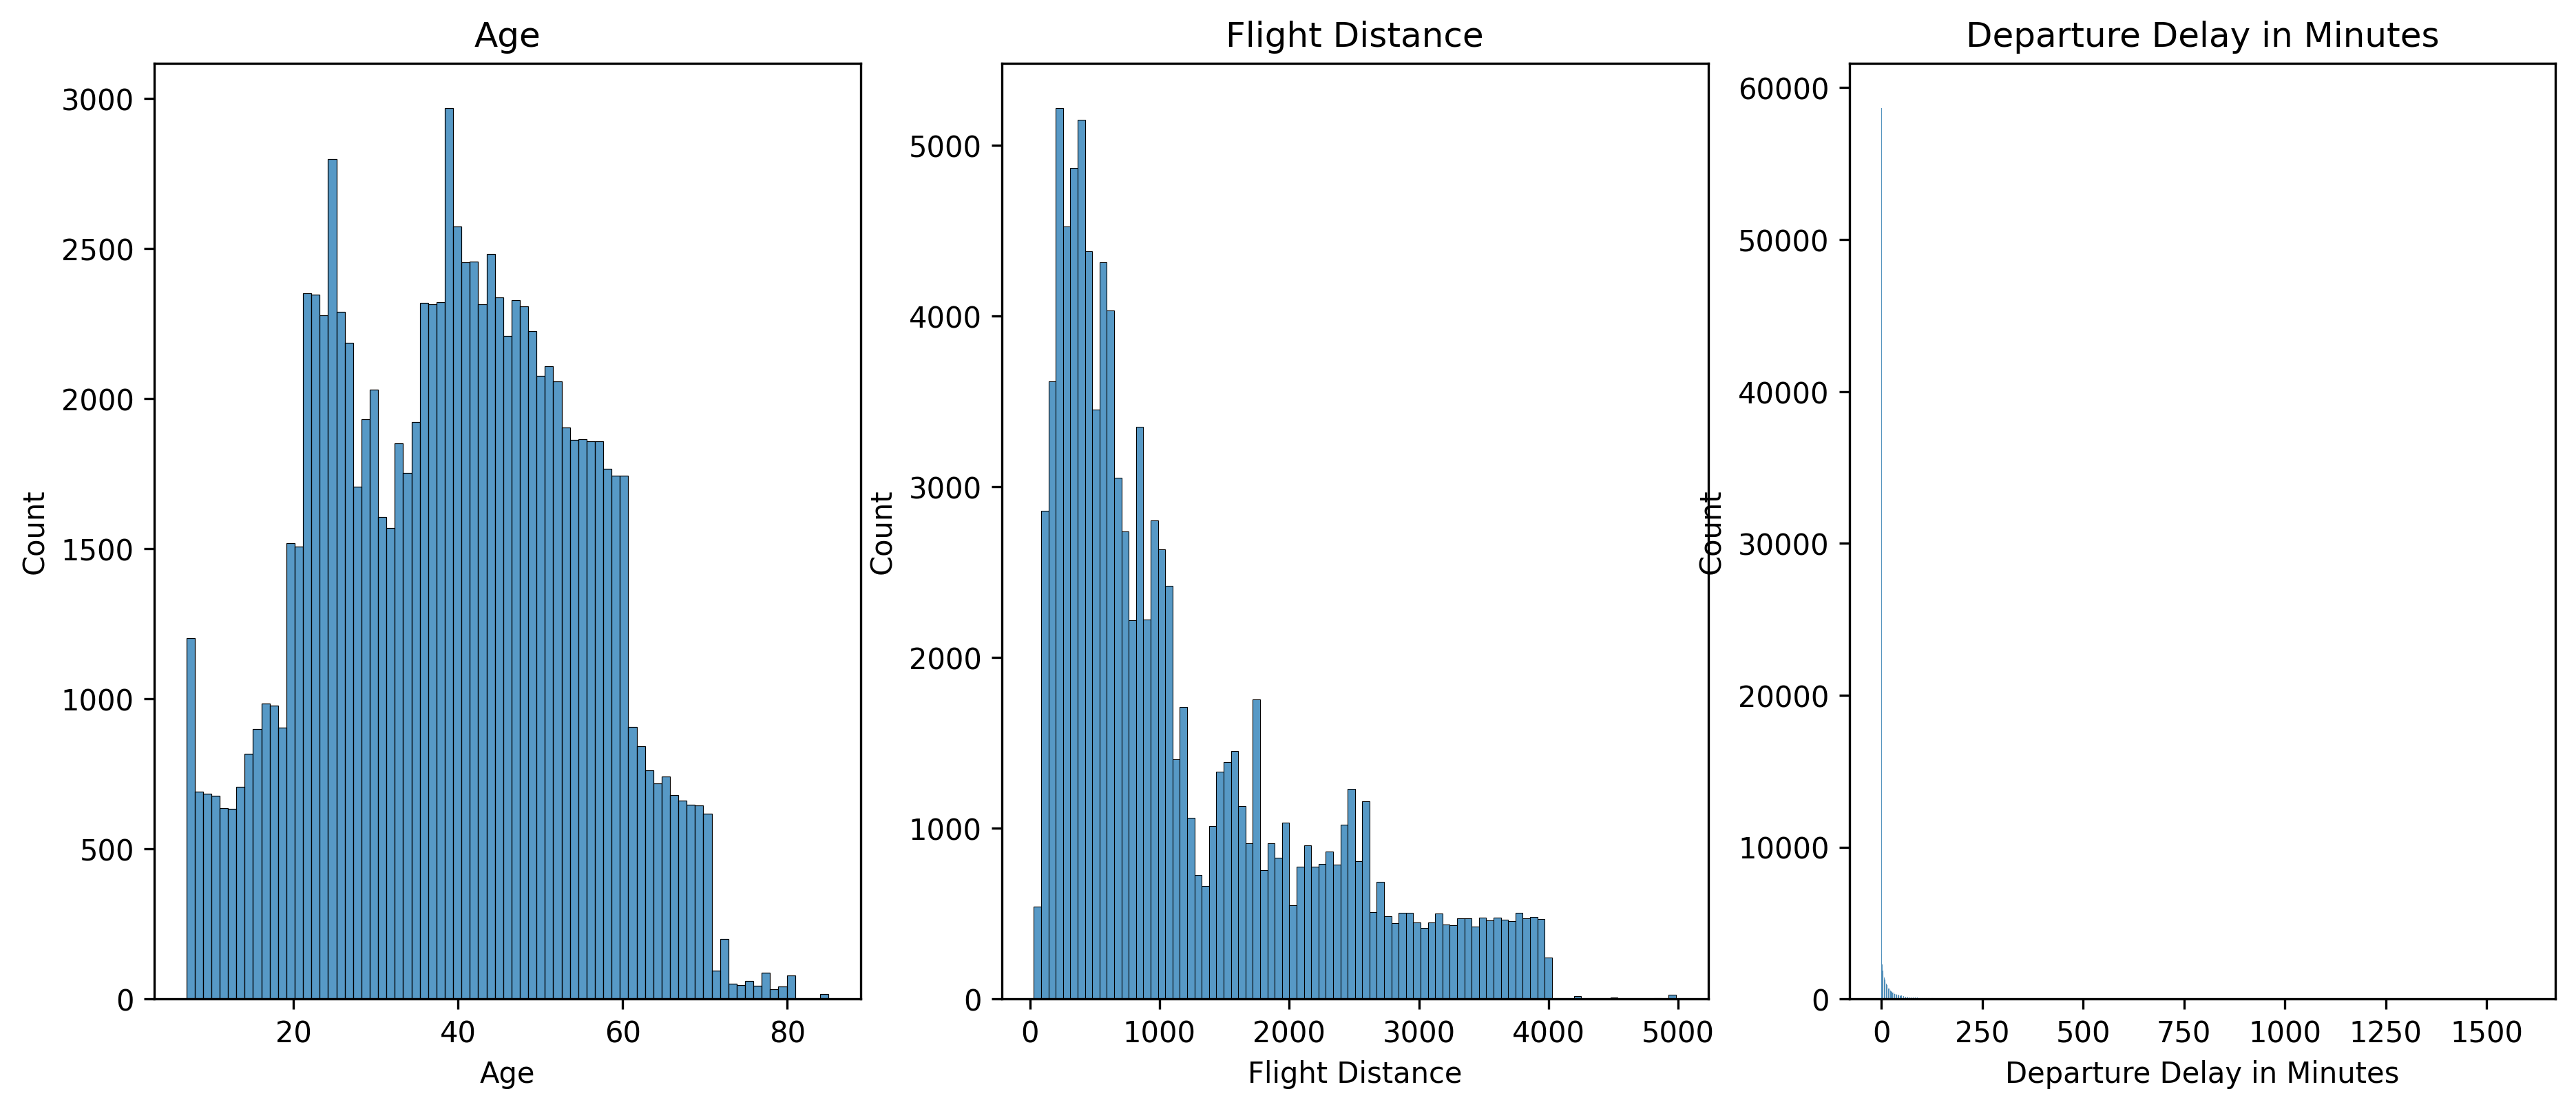

In [68]:
plt.figure(figsize=(15, 6), dpi=300)

for i, feat in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feat])
    plt.title(str(feat))
    
plt.show()

Сотрим на категориальные фичи

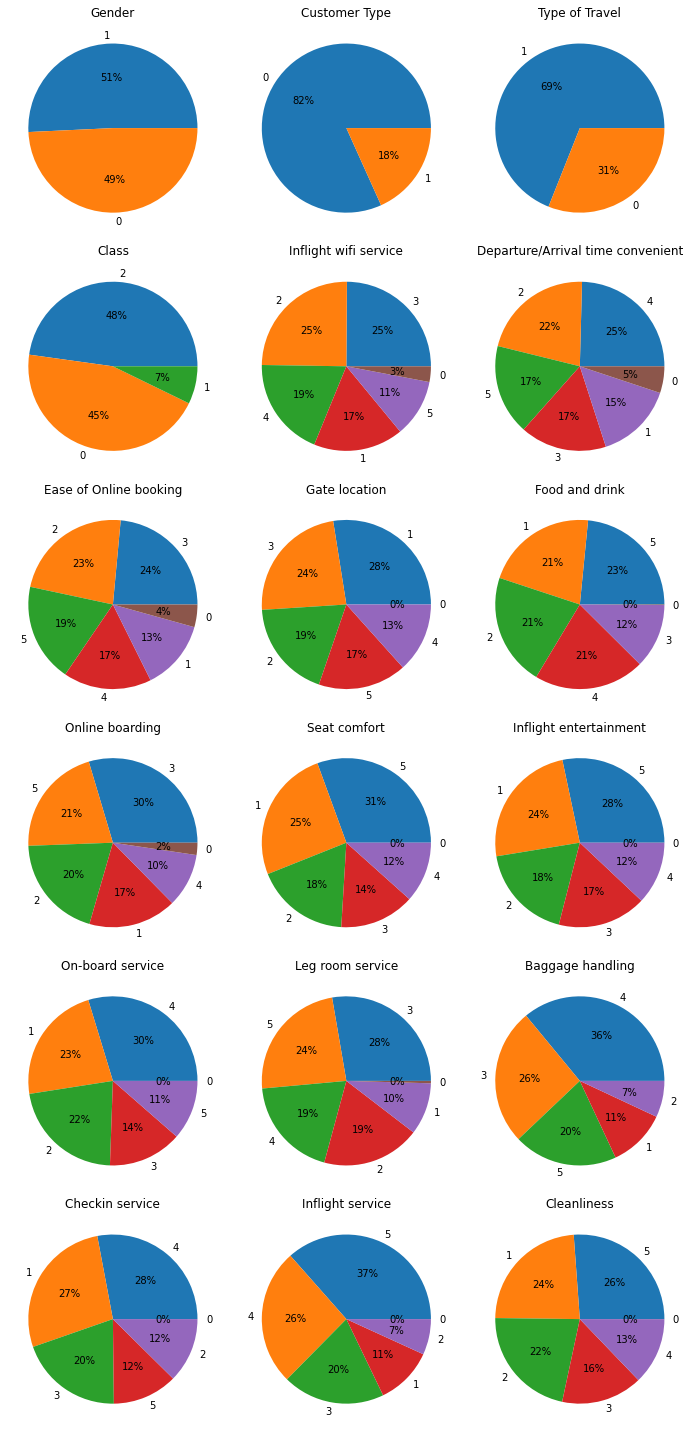

In [80]:
plt.figure(figsize=(10,20))
for i in range(0, len(categorical_features), 3):
    
    plt.subplot(6, 3, i+1)
    plt.pie(x=data[categorical_features[i]].value_counts(), labels=data[categorical_features[i]].unique(), autopct='%.0f%%')
    plt.title(str(categorical_features[i]))
    
    plt.subplot(6, 3, i+2)
    plt.pie(x=data[categorical_features[i+1]].value_counts(), labels=data[categorical_features[i+1]].unique(), autopct='%.0f%%')
    plt.title(str(categorical_features[i+1]))
    
    plt.subplot(6, 3, i+3)
    plt.pie(x=data[categorical_features[i+2]].value_counts(), labels=data[categorical_features[i+2]].unique(), autopct='%.0f%%')
    plt.title(str(categorical_features[i+2]))

plt.tight_layout()    
plt.show()



## Распределение таргета

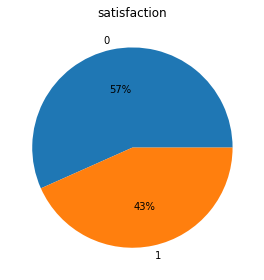

In [81]:
plt.pie(x=data['satisfaction'].value_counts(), labels=data['satisfaction'].unique(), autopct='%.0f%%')
plt.title(str('satisfaction'))
plt.tight_layout()    
plt.show()